<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/05_batchnorm_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Imports
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load and Prepare Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., tf.newaxis].astype("float32") / 255.0
x_test = x_test[..., tf.newaxis].astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Step 3: Define Models

def build_model_with_batchnorm():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def build_model_without_batchnorm():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Step 4: Train both models
model_bn = build_model_with_batchnorm()
history_bn = model_bn.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                          epochs=10, batch_size=64, verbose=0)

model_no_bn = build_model_without_batchnorm()
history_no_bn = model_no_bn.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
                                epochs=10, batch_size=64, verbose=0)

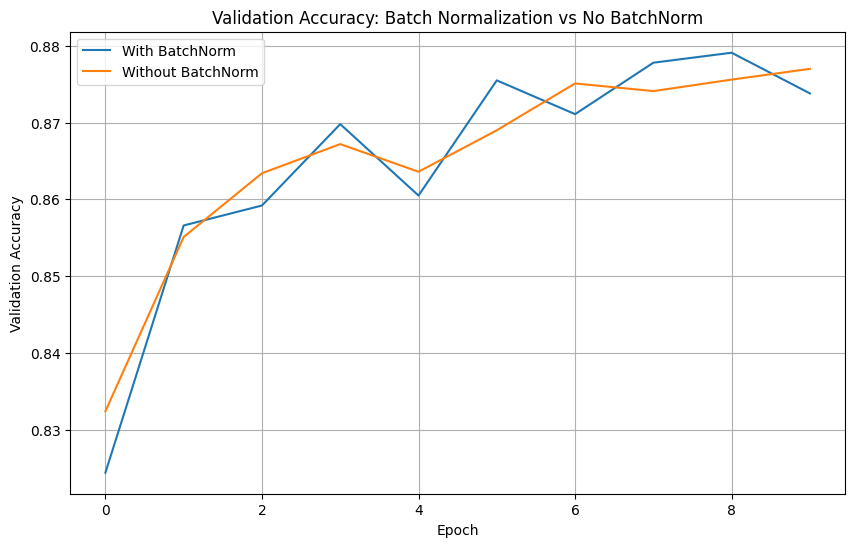

In [5]:
# Step 5: Plot Comparison
plt.figure(figsize=(10, 6))
plt.plot(history_bn.history['val_accuracy'], label='With BatchNorm')
plt.plot(history_no_bn.history['val_accuracy'], label='Without BatchNorm')
plt.title("Validation Accuracy: Batch Normalization vs No BatchNorm")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
